### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('C:/Users/Parthibarajan/Desktop/UCBerkeley/Module_5/Unzipped/coupons.csv')

In [7]:
# Prints the first 5 rows of the data frame
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
# Lets find the total row and column count in the data frame
data.shape

(12684, 26)

In [11]:
# missing values count for all the columns
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
# Dropping the car column
data.drop(columns=['car'], axis=1)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [15]:

print ("coupons accepted: ",data['Y'].value_counts()[1])
print ("coupons not accepted: ",data['Y'].value_counts()[0])
print("total coupons: ",data.shape[0])
# Proportion of accepted vs total
accepted_vs_total = (data['Y'].value_counts()[1]/data.shape[0]) * 100
print(f"Proportion of the total observations chose to accept the coupon is: {accepted_vs_total:.2f}%")


coupons accepted:  7210
coupons not accepted:  5474
total coupons:  12684
Proportion of the total observations chose to accept the coupon is: 56.84%


5. Use a bar plot to visualize the `coupon` column.

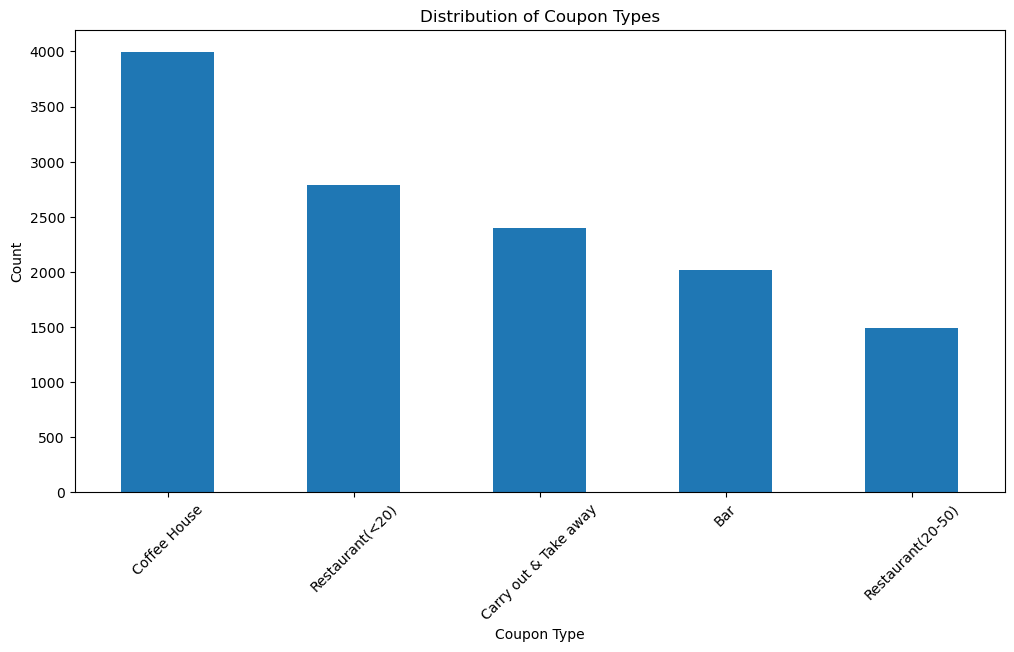

In [17]:
plt.figure(figsize=(12, 6))
data['coupon'].value_counts().plot(kind='bar')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

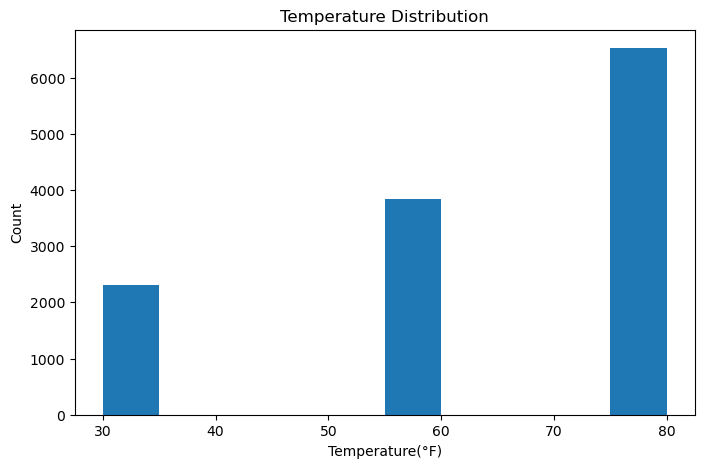

In [19]:
plt.figure(figsize=(8, 5))
data['temperature'].hist()
plt.title('Temperature Distribution')
plt.xlabel('Temperature(°F)')
plt.ylabel('Count')
plt.grid(False)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [21]:
# DataFrame that contains just the bar coupons
data_bar_coupon = data[data['coupon']=='Bar']

2. What proportion of bar coupons were accepted?


In [23]:
print("Total Bar coupons: ",data_bar_coupon.shape[0])
print("Bar coupons accepted: ",data_bar_coupon['Y'].value_counts()[1])

# Proportion of accepted vs total
bar_accepted_vs_total = (data_bar_coupon['Y'].value_counts()[1]/data_bar_coupon.shape[0]) * 100

print(f"Proportion of bar coupons were accepted is: {bar_accepted_vs_total:.2f}%")


Total Bar coupons:  2017
Bar coupons accepted:  827
Proportion of bar coupons were accepted is: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [25]:
data_bar_3_or_less = data_bar_coupon[data_bar_coupon['Bar'].isin(['never', 'less1', '1~3'])]
data_bar_more_than_3 = data_bar_coupon[data_bar_coupon['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates for both groups
acceptance_rate_3_or_less = (data_bar_3_or_less['Y'].mean()) * 100
acceptance_rate_more_than_3 = (data_bar_more_than_3['Y'].mean()) * 100

print(f"Acceptance rate for those who visit bars < 3 times/month: {acceptance_rate_3_or_less:.2f}%")
print(f"Acceptance rate for those who visit bars > 3 times/month: {acceptance_rate_more_than_3:.2f}%")

Acceptance rate for those who visit bars < 3 times/month: 37.06%
Acceptance rate for those who visit bars > 3 times/month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [27]:
# setting 'below21' and '50plus' values in the 'age' column as 'below21' = 20 and '50plus' = 50 
data['age_numeric'] = data['age'].replace({'below21': 20, '50plus': 50}).astype(int)
data_bar_coupon = data[data['coupon']=='Bar']

# dataset for drivers who go to a bar more than once a month and are over the age of 25
data_target_group = data_bar_coupon[(data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['age_numeric'] > 25)]

# dataset for all others
data_other_group = data_bar_coupon[~((data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['age_numeric'] > 25))]

acceptance_rate_target_group = data_target_group['Y'].mean() * 100
acceptance_rate_other_group = data_other_group['Y'].mean() * 100 

print(f"Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25 is: {acceptance_rate_target_group:.2f}%")
print(f"Acceptance Rate for all others is: {acceptance_rate_other_group:.2f}%")


Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25 is: 69.52%
Acceptance Rate for all others is: 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [29]:
#dataset for drivers who got to bars >=1x per month, had non-kid passengers, and had occupations other than farming, fishing, or forestry
filtered_data = data_bar_coupon[(data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['passanger'] != 'Kid(s)') & (~data_bar_coupon['occupation'].isin(['Farming Fishing & Forestry']))]

#acceptance rates for the filtered data group
acceptance_rate_filtered = filtered_data['Y'].mean() * 100

#acceptance rates for all others
acceptance_rate_others = data[~data.index.isin(filtered_data.index)]['Y'].mean() * 100

print(f"Acceptance Rate for drivers who go to a bar >1x times /month and no kid passengers, occupat is not farming, fishing, forestry is: {acceptance_rate_filtered:.2f}%")
print(f"Acceptance Rate for all others: {acceptance_rate_others:.2f}%")

Acceptance Rate for drivers who go to a bar >1x times /month and no kid passengers, occupat is not farming, fishing, forestry is: 71.32%
Acceptance Rate for all others: 56.19%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [31]:
# Condition 1: Go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition1 = (data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['passanger'] != 'Kid(s)') & (data_bar_coupon['maritalStatus'] != 'Widowed')

# Condition 2: Go to bars more than once a month and are under the age of 30
condition2 = (data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['age_numeric'] < 30)

# Condition 3: Go to cheap restaurants more than 4 times a month and income is less than 50K 
condition3 = (data_bar_coupon['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (data_bar_coupon['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))

# Applying conditions to filter data set
dbc_cond1 = data_bar_coupon[condition1]
dbc_cond2 = data_bar_coupon[condition2]
dbc_cond3 = data_bar_coupon[condition3]

# Calculate acceptance rates
c1_acceptance_rates = dbc_cond1['Y'].mean() * 100
c2_acceptance_rates = dbc_cond2['Y'].mean() * 100
c3_acceptance_rates = dbc_cond3['Y'].mean() * 100

print(f"Acceptance rate for Drivers going to bars more than once a month, had passengers that were not a kid, and were not widowed is: {c1_acceptance_rates:.2f}%") 
print(f"Acceptance rate for Drivers going to bars more than once a month and are under the age of 30 is: {c2_acceptance_rates:.2f}%")
print(f"Acceptance rate for Drivers going to cheap restaurants more than 4 times a month and income is less than 50K is: {c3_acceptance_rates:.2f}%")

Acceptance rate for Drivers going to bars more than once a month, had passengers that were not a kid, and were not widowed is: 71.32%
Acceptance rate for Drivers going to bars more than once a month and are under the age of 30 is: 72.17%
Acceptance rate for Drivers going to cheap restaurants more than 4 times a month and income is less than 50K is: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Drivers who go to the bar more than once a month and are over 21 are more likely to accept the bar coupons.
    
Age Factor: Younger drivers, particularly those under the age of 30, show higher acceptance rate for bar coupons.
                                                                                                  
Marital Status and Occupation: Drivers who are not widowed and have occupations outside of farming, fishing, or forestry are more likely to accept bar coupons.

My hypothesize suggest that factors like age and marital status, frequency of bar visits, economic status, and dining habits play critical roles in determining the likelihood of accepting bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Distribution by Age:
 age_numeric
21    19.905213
26    19.905213
31    18.325434
50    12.322275
36     9.952607
41     9.320695
46     5.371248
20     4.897314
Name: proportion, dtype: float64


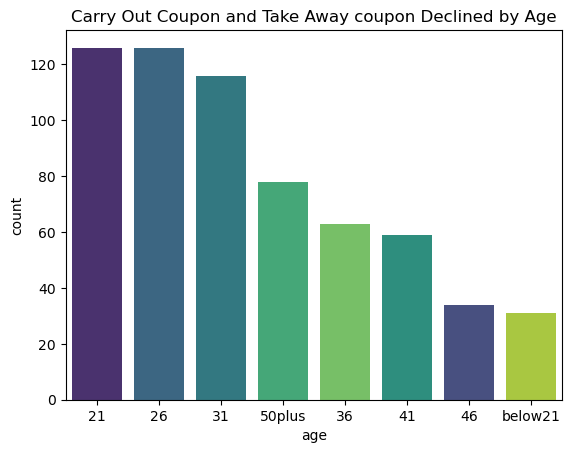

In [177]:
# Data for instances where Carry Out & Take away coupons were declined
data_declined_carryout = data[(data['coupon']=='Carry out & Take away') & (data['Y']==False)]
# coupon declines by age
distr_by_age = data_declined_carryout['age_numeric'].value_counts(normalize=True) * 100

print('Distribution by Age:\n', distr_by_age)

# plot presentation for coupon declines by Age
sns.countplot(x='age', data=data_declined_carryout, hue='age', order=data_declined_carryout['age'].value_counts().index, palette='viridis', legend=False)
plt.title('Carry Out Coupon and Take Away coupon Declined by Age')
plt.show()

Distribution by Marital Status:
 maritalStatus
Married partner      39.968404
Single               37.124803
Unmarried partner    17.535545
Divorced              4.739336
Widowed               0.631912
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Coupon Declines by Marital Status')

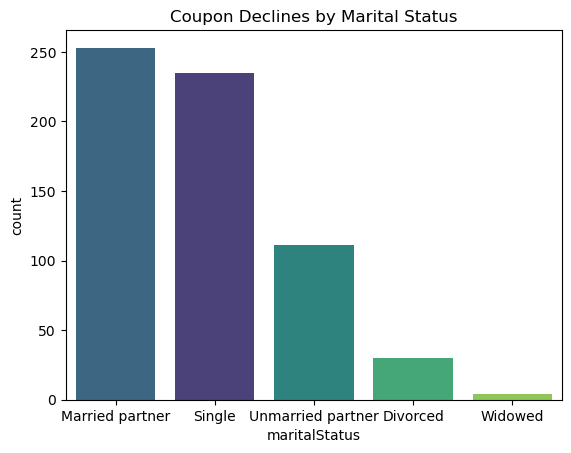

In [75]:
# Coupons declines by marital status
dist_by_marital_status = data_declined_carryout['maritalStatus'].value_counts(normalize=True) * 100

print('Distribution by Marital Status:\n', dist_by_marital_status)

sns.countplot(x='maritalStatus', hue ='maritalStatus', data=data_declined_carryout, palette='viridis', order = data_declined_carryout['maritalStatus'].value_counts().index)
plt.title('Coupon Declines by Marital Status')

Total Coffee coupons:  3996
Coffee coupons accepted:  1995
Proportion of coffee coupons were accepted is: 49.92%


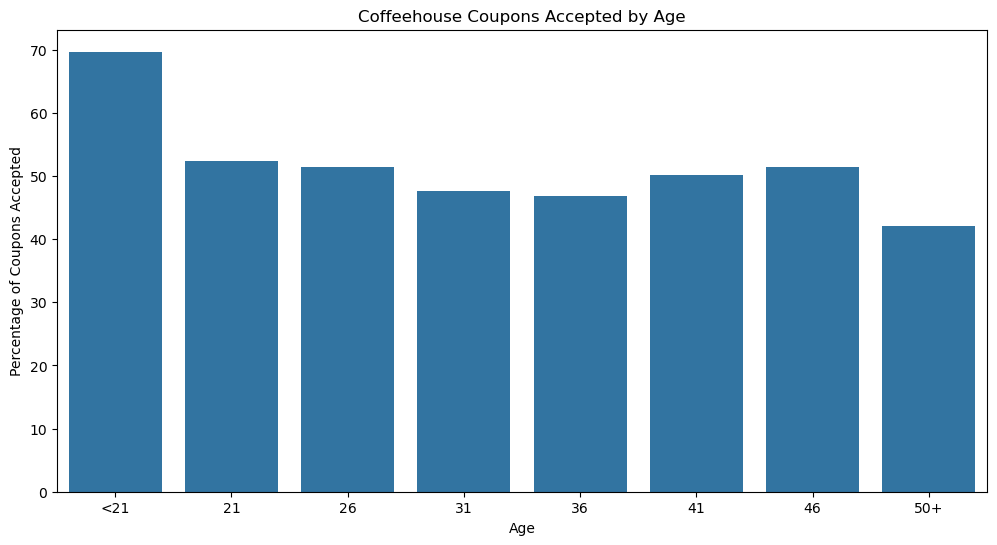

In [175]:
#Coffeehouse Coupons Accepted by age

data_coffee_coupon = data[data['coupon']=='Coffee House']
print("Total Coffee coupons: ",data_coffee_coupon.shape[0])
print("Coffee coupons accepted: ",data_coffee_coupon['Y'].value_counts()[1])

# Proportion of accepted vs total
coffee_accepted_vs_total = (data_coffee_coupon['Y'].value_counts()[1]/data_coffee_coupon.shape[0]) * 100

print(f"Proportion of coffee coupons were accepted is: {coffee_accepted_vs_total:.2f}%")

# Reorder the series based on the custom order
accepted_coffeehouse_by_age = accepted_coffeehouse_by_age.reindex(age_order)
total_coffeehouse_by_age = total_coffeehouse_by_age.reindex(age_order)
percentage_accepted_coffeehouse_by_age = percentage_accepted_coffeehouse_by_age.reindex(age_order)

# Convert to DataFrame for Seaborn
data_plot = pd.DataFrame({
    "age": age_order,
    "acceptance_rate": percentage_accepted_coffeehouse_by_age.reindex(age_order).values
})

# Plot the results using seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=age_order, data=data_plot, y=percentage_accepted_coffeehouse_by_age.values, order=age_order,)
plt.xlabel('Age')
plt.ylabel('Percentage of Coupons Accepted')
plt.title('Coffeehouse Coupons Accepted by Age')
plt.xticks(ticks=range(len(age_order)), labels=age_order_labels)

# Display the plot
plt.show()


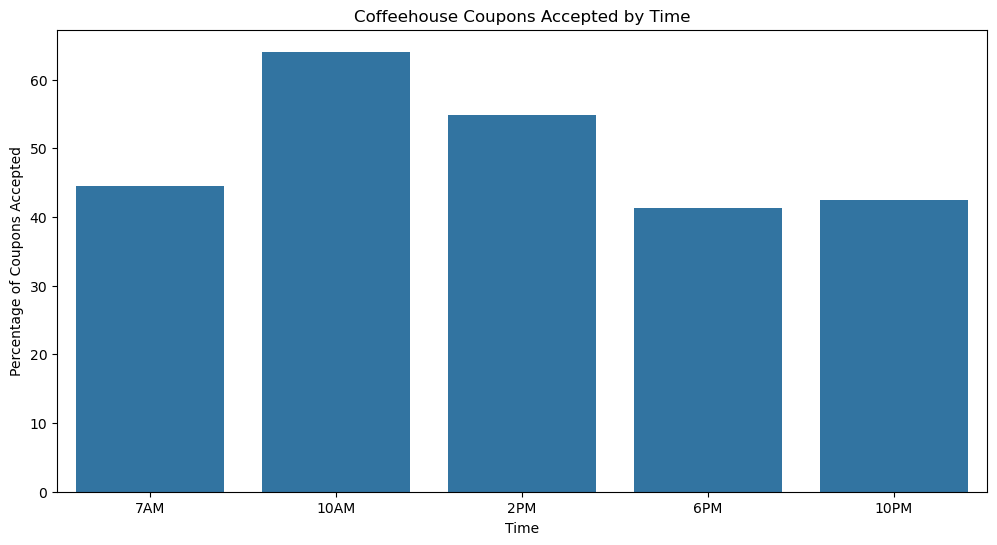

In [173]:
# Total number of accepted Coffeehouse coupons by time
accepted_coffeehouse_by_time = data_coffee_coupon.groupby('time')['Y'].sum() 
total_coffeehouse_by_time = data_coffee_coupon.groupby('time')['Y'].count() 
percentage_accepted_coffeehouse_by_time = (accepted_coffeehouse_by_time / total_coffeehouse_by_time) * 100

# Reorder the series based on the custom order
accepted_coffeehouse_by_time = accepted_coffeehouse_by_time.reindex(time_order)
total_coffeehouse_by_time = total_coffeehouse_by_time.reindex(time_order)
percentage_accepted_coffeehouse_by_time = percentage_accepted_coffeehouse_by_time.reindex(time_order)

# Convert to DataFrame for Seaborn
data_plot = pd.DataFrame({
    "time": time_order,
    "acceptance_rate": percentage_accepted_coffeehouse_by_time.reindex(time_order).values
})

# Plot the results using seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=time_order, data=data_plot, y=percentage_accepted_coffeehouse_by_time.values, order=time_order)
plt.xlabel('Time')
plt.ylabel('Percentage of Coupons Accepted')
plt.title('Coffeehouse Coupons Accepted by Time')
plt.xticks(ticks=range(len(time_order)), labels=time_order_labels)

# Display the plot
plt.show()